## Pengolahan Data Praktikum Fisika Lanjutan 2
## Shawn Michael D.I. - 2106632314

# Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk Regresi Linear
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Untuk Curve Fitting
from scipy.optimize import curve_fit

# Mengganti Plot Style
plt.style.use("ggplot")

# ANP4 - Nuclear Magnetic Resonance (NMR)

## Percobaan 1: NMR Proton pada Sampel Cair dan Padatan

In [ ]:
# Import data

# Gliserin
V1 = np.array([8.4, 8.3, 8.2, 8.1, 8.1, 8.0, 7.9, 7.8, 7.6, 7.6, 7.4, 7.3, 7.0])
B1 = (47.177*V1 + 8.264)*10**-3
f1 = np.array([18.541, 18.321, 18.110, 17.942, 17.760, 17.531, 17.312, 17.153, 16.924, 16.736, 16.521, 16.317, 16.105])*(10**6)
# Polysterin
V2 = np.array([9.4, 9.3, 9.3, 9.1, 8.9, 8.7, 8.5, 8.5, 8.3, 8.1, 7.8, 7.7, 7.3])
B2 = (47.177*V2 + 8.264)*10**-3
f2 = np.array([18.541, 18.321, 18.110, 17.942, 17.760, 17.531, 17.312, 17.153, 16.924, 16.736, 16.521, 16.317, 16.105])*(10**6)
# Teflon/PTFE
V3 = np.array([8.6, 8.5, 8.3, 8.2, 8.1, 7.9, 7.8, 7.8, 0, 0, 0, 0, 0])
B3 = (47.177*V3 + 8.264)*10**-3
f3 = np.array([18.541, 18.321, 18.110, 17.942, 17.760, 17.531, 17.312, 17.153, 16.924, 16.736, 16.521, 16.317, 16.105])*(10**6)

In [ ]:
data1 = pd.DataFrame({"Gliserin_B1":B1, "f1":f1, "Polysterin_B2":B2, "f2":f2, "Teflon_B3":B3, "f3":f3})

In [ ]:
data1

,Gliserin_B1,f1,Polysterin_B2,f2,Teflon_B3,f3
0,0.404551,18541000.0,0.451728,18541000.0,0.413986,18541000.0
1,0.399833,18321000.0,0.447010,18321000.0,0.409269,18321000.0
2,0.395115,18110000.0,0.447010,18110000.0,0.399833,18110000.0
3,0.390398,17942000.0,0.437575,17942000.0,0.395115,17942000.0
4,0.390398,17760000.0,0.428139,17760000.0,0.390398,17760000.0
5,0.385680,17531000.0,0.418704,17531000.0,0.380962,17531000.0
6,0.380962,17312000.0,0.409269,17312000.0,0.376245,17312000.0
7,0.376245,17153000.0,0.409269,17153000.0,0.376245,17153000.0
8,0.366809,16924000.0,0.399833,16924000.0,0.008264,16924000.0
9,0.366809,16736000.0,0.390398,16736000.0,0.008264,16736000.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     328.3
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.54e-09
Time:                        15:17:01   Log-Likelihood:                -172.09
No. Observations:                  13   AIC:                             348.2
Df Residuals:                      11   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.653e+06   8.11e+05      3.271      0.0

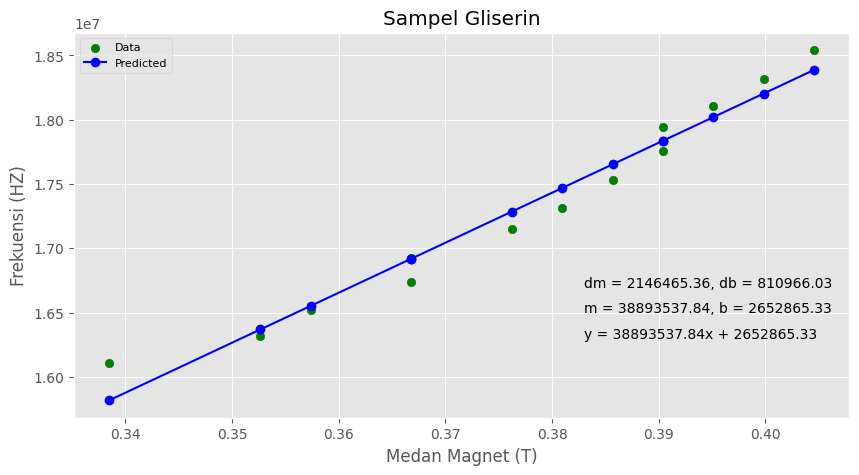

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data1["Gliserin_B1"])
y = np.array(data1["f1"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
#plt.scatter(x, y, color = "blue", label = "Data")
#plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.scatter(x, y, color = "green", label = "Data")
plt.plot(x, y_preds, "o-", color = "blue", label = "Predicted")
plt.title("Sampel Gliserin")
plt.xlabel("Medan Magnet (T)")
plt.ylabel("Frekuensi (HZ)")
plt.text(0.383, 1.63*10**7, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(0.383, 1.65*10**7, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(0.383, 1.67*10**7, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Gliserin.png")

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.61e-10
Time:                        15:16:07   Log-Likelihood:                -169.42
No. Observations:                  13   AIC:                             342.8
Df Residuals:                      11   BIC:                             344.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.263e+06   4.51e+05     16.092      0.0

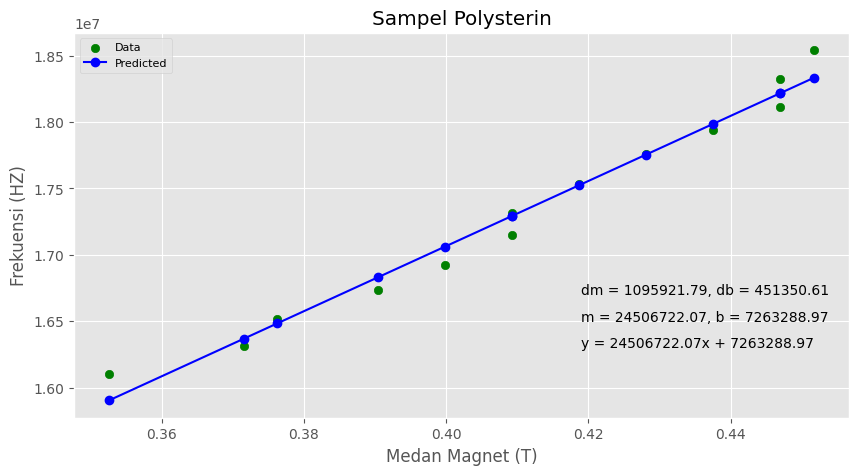

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data1["Polysterin_B2"])
y = np.array(data1["f2"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
#plt.scatter(x, y, color = "blue", label = "Data")
#plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.scatter(x, y, color = "green", label = "Data")
plt.plot(x, y_preds, "o-", color = "blue", label = "Predicted")
plt.title("Sampel Polysterin")
plt.xlabel("Medan Magnet (T)")
plt.ylabel("Frekuensi (HZ)")
plt.text(0.419, 1.63*10**7, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(0.419, 1.65*10**7, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(0.419, 1.67*10**7, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Polysterin_.png")

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     300.2
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           2.37e-06
Time:                        15:16:28   Log-Likelihood:                -99.851
No. Observations:                   8   AIC:                             203.7
Df Residuals:                       6   BIC:                             203.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.767e+06   7.55e+05      6.317      0.0

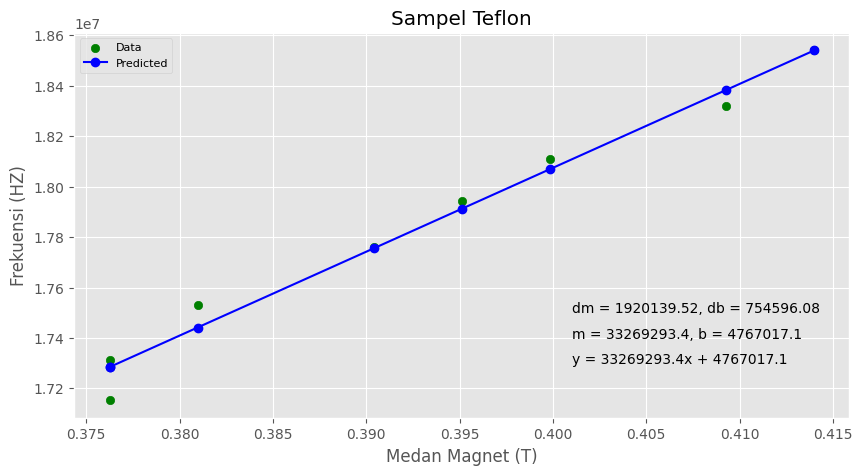

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data1.iloc[:8, [4, 5]]["Teflon_B3"])
y = np.array(data1.iloc[:8, [4, 5]]["f3"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
#plt.scatter(x, y, color = "blue", label = "Data")
#plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.scatter(x, y, color = "green", label = "Data")
plt.plot(x, y_preds, "o-", color = "blue", label = "Predicted")
plt.title("Sampel Teflon")
plt.xlabel("Medan Magnet (T)")
plt.ylabel("Frekuensi (HZ)")
plt.text(0.401, 1.73*10**7, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(0.401, 1.74*10**7, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(0.401, 1.75*10**7, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Teflon_.png")

In [ ]:
# Hasil Gradien Regresi
m1 = 38893537.84
dm1 = 2146465.36
m2 = 24506722.07
dm2 = 1095921.79
m3 = 33269293.4
dm3 = 1920139.52

# Konstanta
h = 6.626*10**-34
u = 5.05*10**-27

# Menghitung faktor g
# Gliserin
g1 = (m1*h)/u
dg1 = (dm1*h)/u
print("Gliserin")
print("g1+dg1 = " + str(g1) + "+" + str(dg1))
krel1 = (dg1/g1)*100
print("krel1 = " + str(krel1) + "%")
klit1 = abs(1 - (g1/5.5857))*100
print("klit1 = " + str(klit1) + "%")
print("\n")

# Polysterin
g2 = (m2*h)/u
dg2 = (dm2*h)/u
print("Polysterin")
print("g2+dg2 = " + str(g2) + "+" + str(dg2))
krel2 = (dg2/g2)*100
print("krel2 = " + str(krel2) + "%")
klit2 = abs(1 - (g2/5.5857))*100
print("klit2 = " + str(klit2) + "%")
print("\n")

# Teflon/PTFE
g3 = (m3*h)/u
dg3 = (dm3*h)/u
print("Teflon")
print("g3+dg3 = " + str(g3) + "+" + str(dg3))
krel3 = (dg3/g3)*100
print("krel3 = " + str(krel3) + "%")
klit3 = abs(1 - (g3/5.2567))*100
print("klit3 = " + str(klit3) + "%")

Gliserin
g1+dg1 = 5.1031402322344555+0.28163325693782176
krel1 = 5.518822609632778%
klit1 = 8.639199523167097%


Polysterin
g2+dg2 = 3.215476048234059+0.14379361941663366
krel2 = 4.47192320078407%
klit2 = 42.43378541214066%


Teflon
g3+dg3 = 4.365194813235643+0.25193751404990095
krel3 = 5.771506767258243%
klit3 = 16.95940774182201%


## Percobaan 2: Menghitung Waktu Relaksasi Sampel Cair dan Padatan

In [ ]:
# Import Data

# Gliserin
f1_kiri = 18.3412
f1_kanan = 18.3518
# Polysterin
f2_kiri = 18.3274
f2_kanan = 18.3275 
# Teflon
f3_kiri = 18.3684
f3_kanan = 18.3685

In [ ]:
data2 = pd.DataFrame({"Gliserin":[f1_kiri, f1_kanan], "Polysterin":[f2_kiri, f2_kanan], "Teflon":[f3_kiri, f3_kanan]}, index = ["f_kiri", "f_kanan"])

In [ ]:
data2

,Gliserin,Polysterin,Teflon
f_kiri,18.3412,18.3274,18.3684
f_kanan,18.3518,18.3275,18.3685


In [ ]:
# Menghitung waktu relaksasi
T1 = 1/((f1_kanan - f1_kiri)*(10**6))
T2 = 1/((f2_kanan - f2_kiri)*(10**6))
T3 = 1/((f3_kanan - f3_kiri)*(10**6))
T = pd.DataFrame({"Gliserin":T1, "Polysterin":T2, "Teflon":T3}, index = ["Waktu Relaksasi (s)"])

In [ ]:
T

,Gliserin,Polysterin,Teflon
Waktu Relaksasi (s),0.000094,0.01,0.01


# ANP2 - Radioactive Decay and Half Life

In [ ]:
t = np.arange(10, 610, 10)
A = np.array([577, 990, 1252, 1582, 1974, 2326, 2736, 3374, 3815, 3993, 4222, 4437, 4584, 4751, 4951, 5100, 5290, 5495, 5636, 5779, 
              5931, 6076, 6201, 6303, 6426, 6546, 6648, 6797, 6902, 7034, 7125, 7235, 7384, 7511, 7633, 7751, 7838, 7950, 8042, 8131,
              8220, 8292, 8400, 8507, 8602, 8709, 8801, 8894, 8976, 9050, 9139, 9231, 9321, 9389, 9462, 9539, 9611, 9680, 9750, 9848])
df = pd.DataFrame({"t (s)":t, "RA (Bq)":A})

In [ ]:
df["selisih"] = df["RA (Bq)"].diff()
df.fillna(577, inplace = True)
df

,t (s),RA (Bq),selisih
0,10,577,577.0
1,20,990,413.0
2,30,1252,262.0
3,40,1582,330.0
4,50,1974,392.0
5,60,2326,352.0
6,70,2736,410.0
7,80,3374,638.0
8,90,3815,441.0
9,100,3993,178.0


In [ ]:
df["ln(RA)"] = np.log(df["selisih"])
df

,t (s),RA (Bq),selisih,ln(RA)
0,10,577,577.0,6.357842
1,20,990,413.0,6.023448
2,30,1252,262.0,5.568345
3,40,1582,330.0,5.799093
4,50,1974,392.0,5.971262
5,60,2326,352.0,5.863631
6,70,2736,410.0,6.016157
7,80,3374,638.0,6.458338
8,90,3815,441.0,6.089045
9,100,3993,178.0,5.181784


<Axes: xlabel='t (s)', ylabel='selisih'>

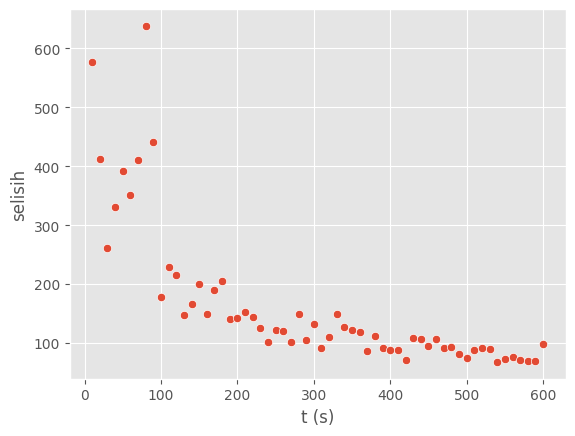

In [ ]:
sns.scatterplot(x = df["t (s)"], y = df["selisih"])

<Axes: xlabel='ln(RA)', ylabel='Count'>

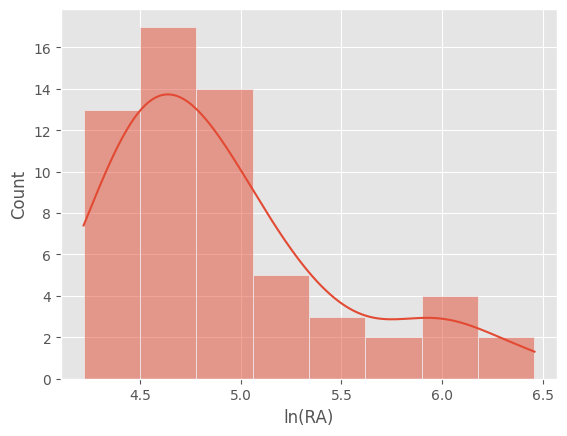

In [ ]:
sns.histplot(df["ln(RA)"], kde = True)

<Axes: xlabel='selisih', ylabel='Count'>

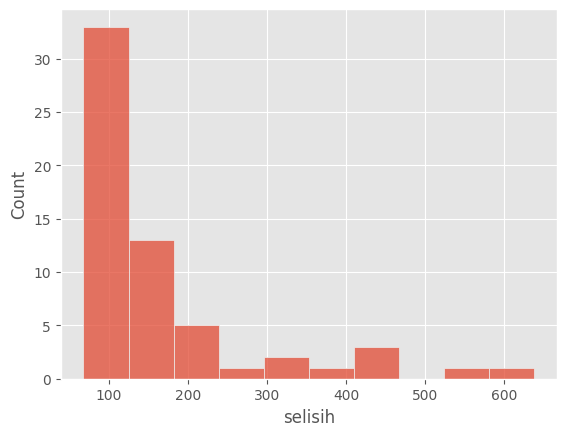

In [ ]:
sns.histplot(df["selisih"], bins = 10)

In [ ]:
df["selisih"].mean()

164.13333333333333

In [ ]:
# Melakukan transformasi data
x = t
y = np.log(df["selisih"])

0     6.357842
1     6.023448
2     5.568345
3     5.799093
4     5.971262
5     5.863631
6     6.016157
7     6.458338
8     6.089045
9     5.181784
10    5.433722
11    5.370638
12    4.990433
13    5.117994
14    5.298317
15    5.003946
16    5.247024
17    5.323010
18    4.948760
19    4.962845
20    5.023881
21    4.976734
22    4.828314
23    4.624973
24    4.812184
25    4.787492
26    4.624973
27    5.003946
28    4.653960
29    4.882802
30    4.510860
31    4.700480
32    5.003946
33    4.844187
34    4.804021
35    4.770685
36    4.465908
37    4.718499
38    4.521789
39    4.488636
40    4.488636
41    4.276666
42    4.682131
43    4.672829
44    4.553877
45    4.672829
46    4.521789
47    4.532599
48    4.406719
49    4.304065
50    4.488636
51    4.521789
52    4.499810
53    4.219508
54    4.290459
55    4.343805
56    4.276666
57    4.234107
58    4.248495
59    4.584967
Name: selisih, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                selisih   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     190.6
Date:                Fri, 05 May 2023   Prob (F-statistic):           5.52e-20
Time:                        07:42:12   Log-Likelihood:                -6.3691
No. Observations:                  60   AIC:                             16.74
Df Residuals:                      58   BIC:                             20.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7740      0.072     80.695      0.0

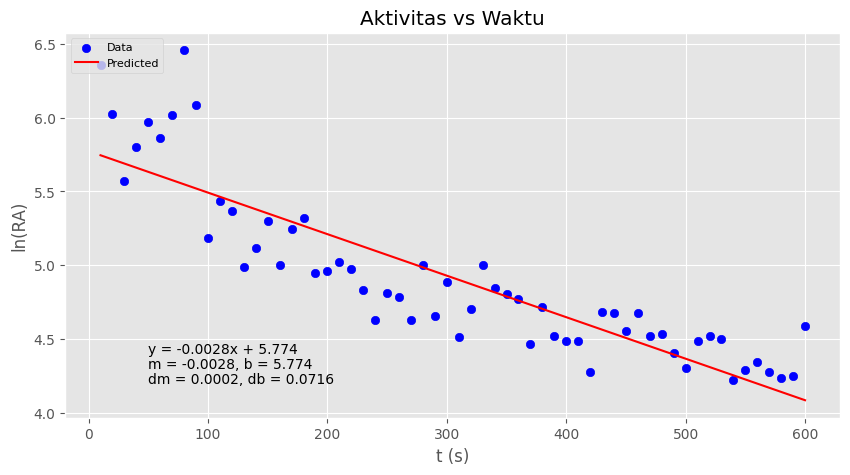

In [ ]:
# Menggunakan Library Statsmodels

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Aktivitas vs Waktu")
plt.xlabel("t (s)")
plt.ylabel("ln(RA)")
plt.text(50, 4.4, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(50, 4.3, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(50, 4.2, "dm = " + str(results.bse[1].round(4)) + ", db = " + str(results.bse[0].round(4)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Aktivitas.png")

In [ ]:
# Hasil gradien regresi
m = -0.0028
dm = 0.0002

# Konstanta radiasi
lamda = -m
delta_lamda = dm
kr1 = np.abs(delta_lamda/lamda) * 100
kl1 = np.abs((0.004528 - lamda)/0.004528)
print("Konstanta Radiasi")
print("lamda+delta_lamda = " + str(lamda) + " + " + str(delta_lamda))
print("krelatif = " + str(kr1) + "%")
print("kliteratur = " + str(kl1) + "%")
print("")

# Waktu Paruh
tparuh = np.log(2)/lamda
delta_tparuh = np.abs(-np.log(2)/lamda**2) * delta_lamda
kr2 = np.abs(delta_tparuh/tparuh) * 100
kl2 = np.abs((153.08 - tparuh)/153.08)
print("Waktu Paruh")
print("tparuh+delta_tparuh = " + str(tparuh) + " + " + str(delta_tparuh))
print("krelatif = " + str(kr2) + "%")
print("kliteratur = " + str(kl2) + "%")

Konstanta Radiasi
lamda+delta_lamda = 0.0028 + 0.0002
krelatif = 7.142857142857144%
kliteratur = 0.38162544169611307%

Waktu Paruh
tparuh+delta_tparuh = 247.55256448569475 + 17.682326034692483
krelatif = 7.142857142857144%
kliteratur = 0.6171450515135533%


<Axes: >

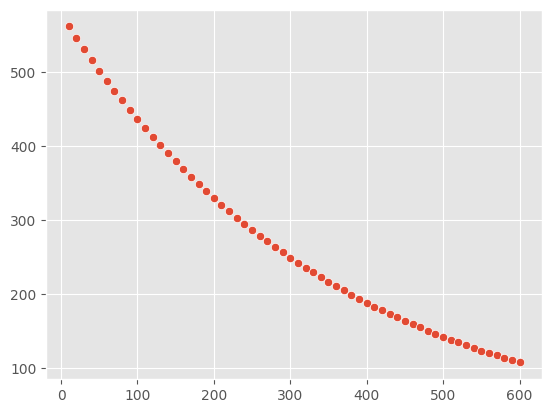

In [ ]:
t = np.arange(10, 610, 10)
f = 577*np.exp(-lamda*t)
sns.scatterplot(x = t, y = f)

In [ ]:
f = 577*np.exp(-0.00458*t)

<Axes: ylabel='Count'>

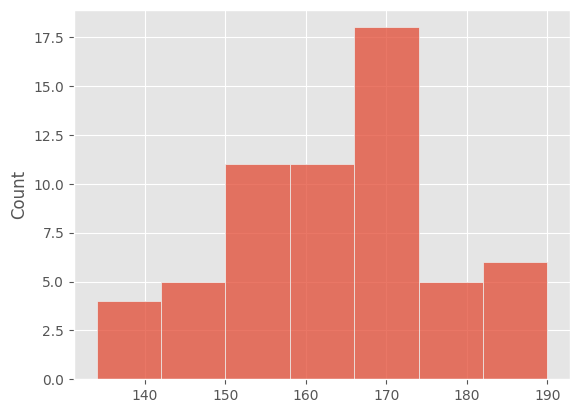

In [ ]:
sns.histplot(np.random.poisson(df["selisih"].mean(), 60))

<Axes: ylabel='Count'>

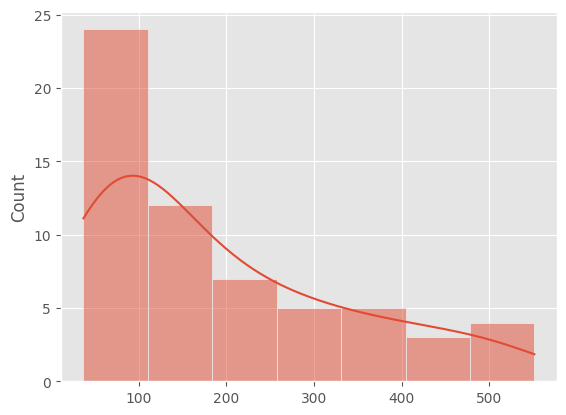

In [ ]:
sns.histplot(f, kde = True)

# ANP3 - Franck Hertz

## Percobaan 1: Mencari Kurva Franck Hertz

In [ ]:
data = pd.read_excel("/content/Bess Shawn.xlsx")

In [ ]:
data.columns

Index(['u1 :2,16v', 'u3: 4,20v', 'u1: 1,95v', 'u3:7,66v', 'u1: 1,67v',
       'u3: 6,84v', 'Luminasi ui:3v u3:5v', 'Unnamed: 7'],
      dtype='object')

In [ ]:
data

,"u1 :2,16v","u3: 4,20v","u1: 1,95v","u3:7,66v","u1: 1,67v","u3: 6,84v",Luminasi ui:3v u3:5v,Unnamed: 7
0,$U_B$ / V,$I_A$ / nA,U_B / V,NaN,$U_B$ / V,$I_A$ / nA,$U_B$ / V,$I_A$ / nA
1,0.95,0.15,0.3,0.00,1.35,0.27,0,0.08
2,1.2,0.17,0.55,0.39,1.6,0.12,0,0.08
3,1.5,0.24,0.8,0.39,1.9,0.14,0,0.08
4,1.75,0.17,1.15,0.06,2.15,0.14,0,0.08
...,...,...,...,...,...,...,...,...
397,78.6,12.74,78.6,12.74,78.65,12.74,NaN,NaN
398,78.6,12.74,78.6,12.74,78.65,12.74,NaN,NaN
399,78.6,12.74,78.6,12.74,78.65,12.74,NaN,NaN
400,78.6,12.74,78.6,12.74,78.65,12.74,NaN,NaN


In [ ]:
# Melakukan preprocessing dataframe
data = data.iloc[1:, :]
data.columns = ["U1", "I1", "U2", "I2", "U3", "I3", "V2", "II2"]

In [ ]:
spec = ["U1_216", "U3_420", "U1_195", "U3_766", "U1_167", "U3_684", "U2"]

In [ ]:
data.head(19)

,U1,I1,U2,I2,U3,I3,V2,II2
1,0.95,0.15,0.3,0.00,1.35,0.27,0,0.08
2,1.2,0.17,0.55,0.39,1.6,0.12,0,0.08
3,1.5,0.24,0.8,0.39,1.9,0.14,0,0.08
4,1.75,0.17,1.15,0.06,2.15,0.14,0,0.08
5,2,0.18,1.5,0.06,2.4,0.15,0,0.06
6,2.25,0.18,2.75,0.39,2.65,0.15,0,0.06
7,2.5,0.18,1.9,0.11,2.9,0.15,0,0.06
8,2.8,0.2,2.1,0.06,3.2,0.17,0,0.06
9,3.05,0.2,2.35,0.08,3.45,0.17,0,0.06
10,3.25,0.2,2.6,0.09,3.7,0.17,0,0.06


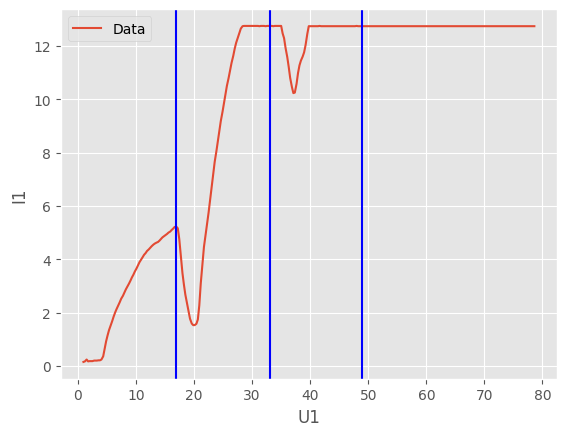

In [ ]:
# Kurva A
sns.lineplot(x = data["U1"], y = data["I1"], label = "Data")
plt.axvline(16.95, color = "blue")
plt.axvline(33, color = "blue")
plt.axvline(49, color = "blue")

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.233e+06
Date:                Sat, 20 May 2023   Prob (F-statistic):           0.000573
Time:                        04:36:10   Log-Likelihood:                 9.0659
No. Observations:                   3   AIC:                            -14.13
Df Residuals:                       1   BIC:                            -15.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9333      0.031     29.933      0.0

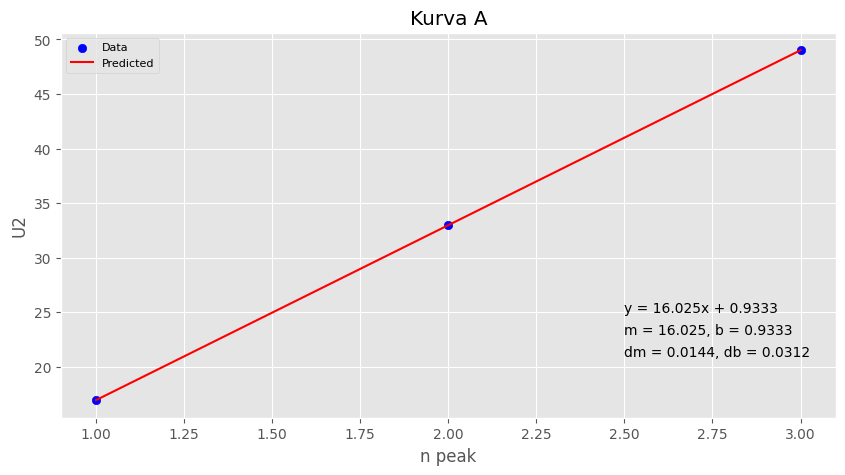

In [ ]:
# Menggunakan Library Statsmodels
x = np.array([1, 2, 3])
y = np.array([16.95, 33, 49])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Kurva A")
plt.xlabel("n peak")
plt.ylabel("U2")
plt.text(2.5, 25, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(2.5, 23, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(2.5, 21, "dm = " + str(results.bse[1].round(4)) + ", db = " + str(results.bse[0].round(4)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("kurvaA.png")

In [ ]:
# Peak Voltage
V = [16.95, 33, 49]

In [ ]:
data[["U1", "I1"]]

,U1,I1
1,0.95,0.15
2,1.2,0.17
3,1.5,0.24
4,1.75,0.17
5,2,0.18
...,...,...
397,78.6,12.74
398,78.6,12.74
399,78.6,12.74
400,78.6,12.74


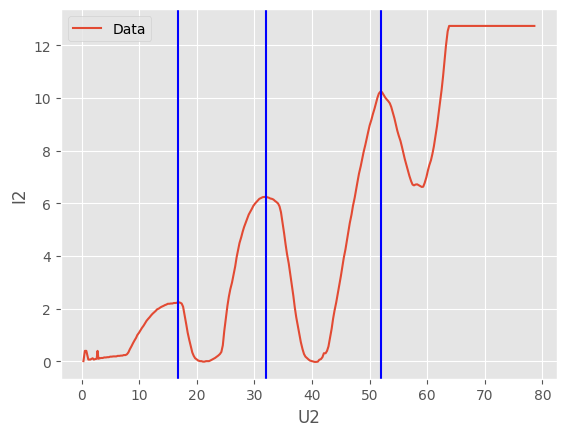

In [ ]:
# Kurva E
sns.lineplot(x = data["U2"], y = data["I2"], label = "Data")
plt.axvline(16.8, color = "blue")
plt.axvline(31.95, color = "blue")
plt.axvline(51.9, color = "blue")

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0502
Time:                        04:54:27   Log-Likelihood:                -4.6271
No. Observations:                   3   AIC:                             13.25
Df Residuals:                       1   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5500      2.993     -0.518      0.6

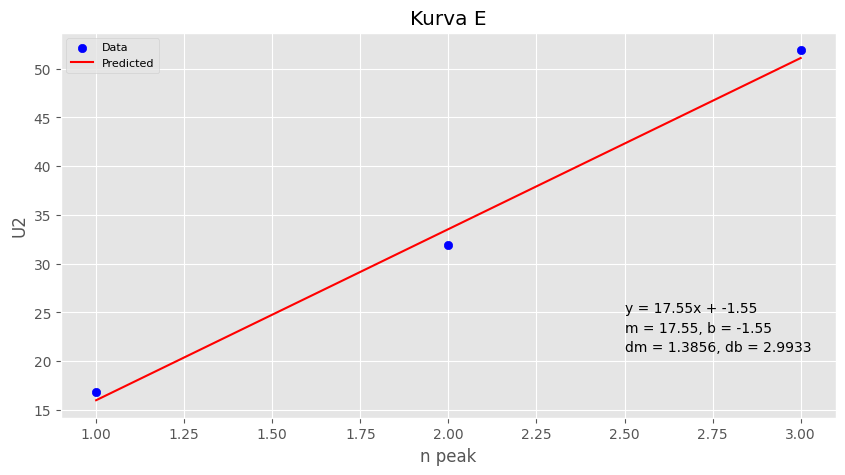

In [ ]:
# Menggunakan Library Statsmodels
x = np.array([1, 2, 3])
y = np.array([16.8, 31.95, 51.9])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Kurva E")
plt.xlabel("n peak")
plt.ylabel("U2")
plt.text(2.5, 25, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(2.5, 23, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(2.5, 21, "dm = " + str(results.bse[1].round(4)) + ", db = " + str(results.bse[0].round(4)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("kurvaE.png")

In [ ]:
V = [16.8, 31.95, 51.9]

In [ ]:
data[["U2", "I2"]]

,U2,I2
1,0.3,0.00
2,0.55,0.39
3,0.8,0.39
4,1.15,0.06
5,1.5,0.06
...,...,...
397,78.6,12.74
398,78.6,12.74
399,78.6,12.74
400,78.6,12.74


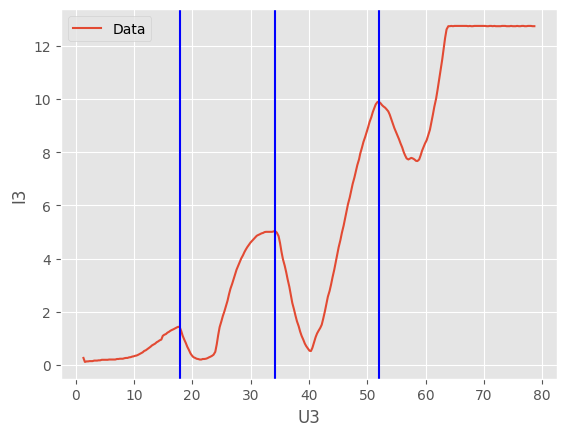

In [ ]:
# Kurva C
sns.lineplot(x = data["U3"], y = data["I3"], label = "Data")
plt.axvline(17.85, color = "blue")
plt.axvline(34.25, color = "blue")
plt.axvline(52, color = "blue")

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0145
Time:                        04:54:49   Log-Likelihood:               -0.82157
No. Observations:                   3   AIC:                             5.643
Df Residuals:                       1   BIC:                             3.840
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5500      0.842      0.653      0.6

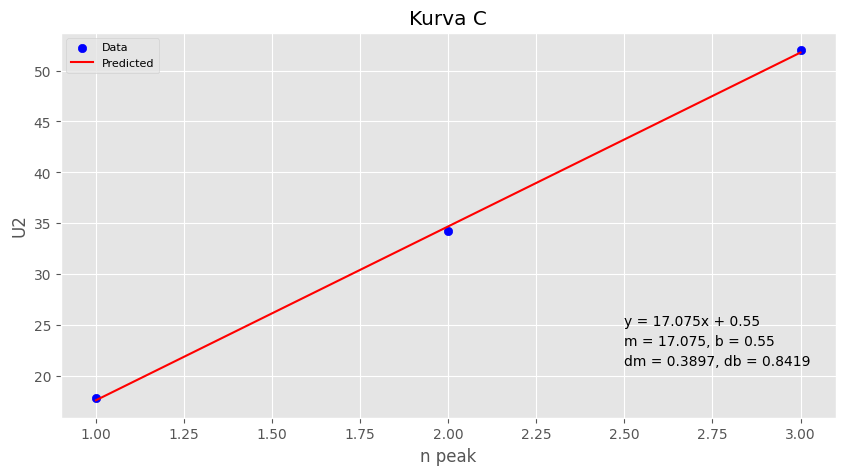

In [ ]:
# Menggunakan Library Statsmodels
x = np.array([1, 2, 3])
y = np.array([17.85, 34.25, 52])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Kurva C")
plt.xlabel("n peak")
plt.ylabel("U2")
plt.text(2.5, 25, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(2.5, 23, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(2.5, 21, "dm = " + str(results.bse[1].round(4)) + ", db = " + str(results.bse[0].round(4)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("kurvaC.png")

In [ ]:
data[["U3", "I3"]]

,U3,I3
1,1.35,0.27
2,1.6,0.12
3,1.9,0.14
4,2.15,0.14
5,2.4,0.15
...,...,...
397,78.65,12.74
398,78.65,12.74
399,78.65,12.74
400,78.65,12.74


In [ ]:
V = [17.85, 34.25, 52]

## Percobaan 2: Mengamati Fenomena Luminasi

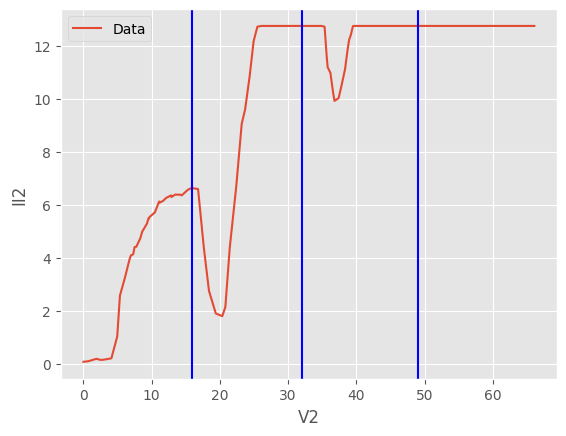

In [ ]:
sns.lineplot(x = data["V2"], y = data["II2"], label = "Data")
plt.axvline(15.85, color = "blue")
plt.axvline(32, color = "blue")
plt.axvline(49, color = "blue")

In [ ]:
peak = [15.85, 32, 49]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4563.
Date:                Sat, 20 May 2023   Prob (F-statistic):            0.00942
Time:                        05:19:13   Log-Likelihood:                0.56630
No. Observations:                   3   AIC:                             2.867
Df Residuals:                       1   BIC:                             1.065
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8667      0.530     -1.635      0.3

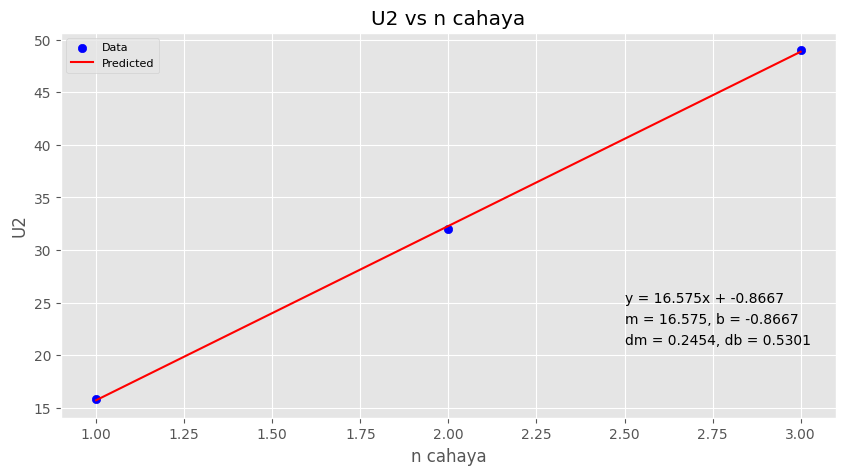

In [ ]:
# Menggunakan Library Statsmodels
x = np.array([1, 2, 3])
y = np.array([15.85, 32, 49])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("U2 vs n cahaya")
plt.xlabel("n cahaya")
plt.ylabel("U2")
plt.text(2.5, 25, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(2.5, 23, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(2.5, 21, "dm = " + str(results.bse[1].round(4)) + ", db = " + str(results.bse[0].round(4)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Luminasi.png")

# EM4 - Thomson Tube

## Percobaan 1: Defleksi pada Medan Listrik

In [ ]:
x = np.arange(1, 10)*(10**-2)
up3 = np.array([0, 0.2, 0.5, 0.85, 1.2, 1.8, 2.1, 0, 0])
up4 = np.array([0, 0.2, 0.6, 1, 1.5, 2.2, 0, 0, 0])
up5 = np.array([0, 0.3, 0.7, 1.1, 1.7, 2.5, 0, 0, 0])
data = pd.DataFrame({"x":x, "Up3":up3, "Up4":up4, "Up5":up5})
data

,x,Up3,Up4,Up5
0,0.01,0.00,0.0,0.0
1,0.02,0.20,0.2,0.3
2,0.03,0.50,0.6,0.7
3,0.04,0.85,1.0,1.1
4,0.05,1.20,1.5,1.7
5,0.06,1.80,2.2,2.5
6,0.07,2.10,0.0,0.0
7,0.08,0.00,0.0,0.0
8,0.09,0.00,0.0,0.0


In [ ]:
Up = np.array([3, 4, 5])*(10**3)
Ua = 4*(10**3)
d = 5.5*(10**-2)
Etheo = Up/d
Eeks = 0.75*Etheo

In [ ]:
data["y3"] = ((Etheo[0]/(4*Ua))*data["x"]**2)*100
data["y4"] = ((Etheo[1]/(4*Ua))*data["x"]**2)*100
data["y5"] = ((Etheo[2]/(4*Ua))*data["x"]**2)*100

In [ ]:
data["x"] = data["x"] * 100

In [ ]:
data

,x,Up3,Up4,Up5,y3,y4,y5
0,1.0,0.00,0.0,0.0,0.034091,0.045455,0.056818
1,2.0,0.20,0.2,0.3,0.136364,0.181818,0.227273
2,3.0,0.50,0.6,0.7,0.306818,0.409091,0.511364
3,4.0,0.85,1.0,1.1,0.545455,0.727273,0.909091
4,5.0,1.20,1.5,1.7,0.852273,1.136364,1.420455
5,6.0,1.80,2.2,2.5,1.227273,1.636364,2.045455
6,7.0,2.10,0.0,0.0,1.670455,2.227273,2.784091
7,8.0,0.00,0.0,0.0,2.181818,2.909091,3.636364
8,9.0,0.00,0.0,0.0,2.761364,3.681818,4.602273


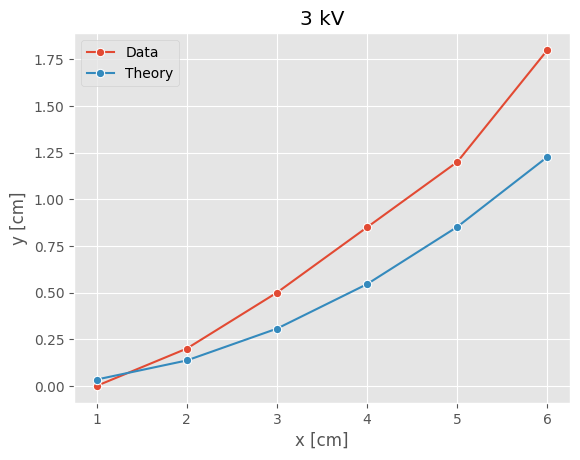

In [ ]:
# 3kV
sns.lineplot(x = data.iloc[0:6, 0], y = data.iloc[0:6, 1], marker = "o", label = "Data")
sns.lineplot(x = data.iloc[0:6, 0], y = data.iloc[0:6, 4], marker = "o", label = "Theory")
plt.title("3 kV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.legend()
plt.savefig("3kV.png")

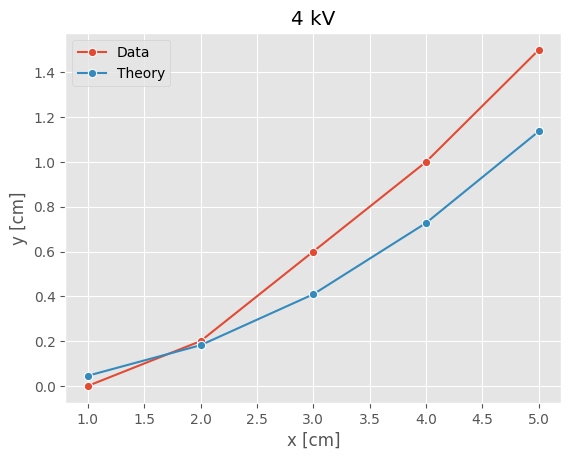

In [ ]:
# 4kV
sns.lineplot(x = data.iloc[0:5, 0], y = data.iloc[0:5, 2], marker = "o", label = "Data")
sns.lineplot(x = data.iloc[0:5, 0], y = data.iloc[0:5, 5], marker = "o", label = "Theory")
plt.title("4 kV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.legend()
plt.savefig("4kV.png")

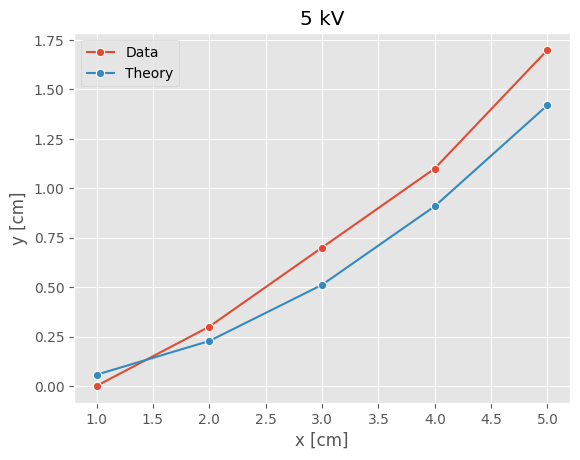

In [ ]:
# 5kV
sns.lineplot(x = data.iloc[0:5, 0], y = data.iloc[0:5, 3], marker = "o", label = "Data")
sns.lineplot(x = data.iloc[0:5, 0], y = data.iloc[0:5, 6], marker = "o", label = "Theory")
plt.title("5 kV")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.legend()
plt.savefig("5kV.png")

## Percobaan 2: Defleksi pada Medan Magnet

In [ ]:
x = np.arange(1, 10)*10**-2
I1 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.8])*10**-2
I2 = np.array([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.1, 1.4])*10**-2
I3 = np.array([0, 0.1, 0.2, 0.4, 0.7, 0.9, 1.3, 1.6, 2])*10**-2
data = pd.DataFrame({"x":x, "I1":I1, "I2":I2, "I3":I3})
data

,x,I1,I2,I3
0,0.01,0.0000,0.000,0.000
1,0.02,0.0005,0.001,0.001
2,0.03,0.0010,0.002,0.002
3,0.04,0.0015,0.003,0.004
4,0.05,0.0020,0.005,0.007
5,0.06,0.0025,0.007,0.009
6,0.07,0.0030,0.009,0.013
7,0.08,0.0050,0.011,0.016
8,0.09,0.0080,0.014,0.020


In [ ]:
# Mendefinisikan variabel
N = 320
mu0 = 4*np.pi*(10**-7)
R = 0.067
Ua = 4*(10**3)

B1 = mu0*((4/5)**(3/2))*(N*0.1)/R
B2 = mu0*((4/5)**(3/2))*(N*0.2)/R
B3 = mu0*((4/5)**(3/2))*(N*0.3)/R

r1 = np.sqrt(2*Ua/(1.7588*(10**11)*B1**2))
r2 = np.sqrt(2*Ua/(1.7588*(10**11)*B2**2))
r3 = np.sqrt(2*Ua/(1.7588*(10**11)*B3**2))

data["y1"] = (r1 - np.sqrt(r1**2 - data["x"]**2))*100
data["y2"] = (r2 - np.sqrt(r2**2 - data["x"]**2))*100
data["y3"] = (r3 - np.sqrt(r3**2 - data["x"]**2))*100

In [ ]:
r3

0.16553715623390586

In [ ]:
data["r1"] = (data["I1"]**2 + data["x"]**2)/(2*data["I1"])
data["r2"] = (data["I2"]**2 + data["x"]**2)/(2*data["I2"])
data["r3"] = (data["I3"]**2 + data["x"]**2)/(2*data["I3"])

In [ ]:
data

,x,I1,I2,I3,y1,y2,y3,r1,r2,r3
0,0.01,0.0000,0.000,0.000,0.010069,0.020145,0.030232,inf,inf,inf
1,0.02,0.0005,0.001,0.001,0.040289,0.080677,0.121263,0.400250,0.200500,0.200500
2,0.03,0.0010,0.002,0.002,0.090697,0.181894,0.274112,0.450500,0.226000,0.226000
3,0.04,0.0015,0.003,0.004,0.161354,0.324301,0.490543,0.534083,0.268167,0.202000
4,0.05,0.0020,0.005,0.007,0.252347,0.508621,0.773174,0.626000,0.252500,0.182071
5,0.06,0.0025,0.007,0.009,0.363789,0.735815,1.125641,0.721250,0.260643,0.204500
6,0.07,0.0030,0.009,0.013,0.495819,1.007111,1.552866,0.818167,0.276722,0.194962
7,0.08,0.0050,0.011,0.016,0.648602,1.324034,2.061459,0.642500,0.296409,0.208000
8,0.09,0.0080,0.014,0.020,0.822335,1.688461,2.660354,0.510250,0.296286,0.212500


In [ ]:
data["EM1"] = (2*Ua)/(B1*data["r1"])**2
data["EM2"] = (2*Ua)/(B2*data["r2"])**2
data["EM3"] = (2*Ua)/(B3*data["r3"])**2

In [ ]:
data["I1"] = data["I1"] * 100
data["I2"] = data["I2"] * 100
data["I3"] = data["I3"] * 100
data["x"] = data["x"] * 100

In [ ]:
data

,x,I1,I2,I3,y1,y2,y3,r1,r2,r3,EM1,EM2,EM3
0,1.0,0.00,0.0,0.0,0.010069,0.020145,0.030232,inf,inf,inf,0.000000e+00,0.000000e+00,0.000000e+00
1,2.0,0.05,0.1,0.1,0.040289,0.080677,0.121263,0.400250,0.200500,0.200500,2.707617e+11,2.697498e+11,1.198888e+11
2,3.0,0.10,0.2,0.2,0.090697,0.181894,0.274112,0.450500,0.226000,0.226000,2.137275e+11,2.123113e+11,9.436057e+10
3,4.0,0.15,0.3,0.4,0.161354,0.324301,0.490543,0.534083,0.268167,0.202000,1.520659e+11,1.507927e+11,1.181149e+11
4,5.0,0.20,0.5,0.7,0.252347,0.508621,0.773174,0.626000,0.252500,0.182071,1.106882e+11,1.700855e+11,1.453864e+11
5,6.0,0.25,0.7,0.9,0.363789,0.735815,1.125641,0.721250,0.260643,0.204500,8.338315e+10,1.596240e+11,1.152447e+11
6,7.0,0.30,0.9,1.3,0.495819,1.007111,1.552866,0.818167,0.276722,0.194962,6.479871e+10,1.416126e+11,1.267972e+11
7,8.0,0.50,1.1,1.6,0.648602,1.324034,2.061459,0.642500,0.296409,0.208000,1.050760e+11,1.234261e+11,1.113989e+11
8,9.0,0.80,1.4,2.0,0.822335,1.688461,2.660354,0.510250,0.296286,0.212500,1.666034e+11,1.235289e+11,1.067308e+11


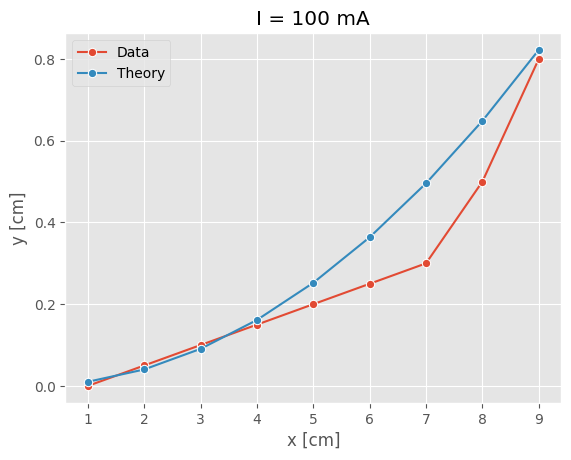

In [ ]:
sns.lineplot(x = data["x"], y = data["I1"], marker = "o", label = "Data")
sns.lineplot(x = data["x"], y = data["y1"], marker = "o", label = "Theory")
plt.title("I = 100 mA")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.savefig("I100.png")

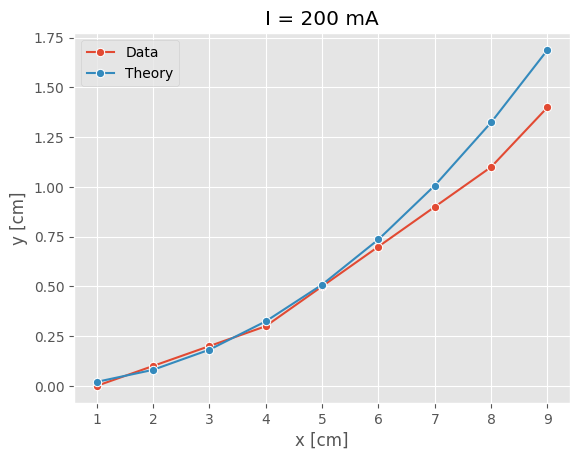

In [ ]:
sns.lineplot(x = data["x"], y = data["I2"], marker = "o", label = "Data")
sns.lineplot(x = data["x"], y = data["y2"], marker = "o", label = "Theory")
plt.title("I = 200 mA")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.savefig("I200.png")

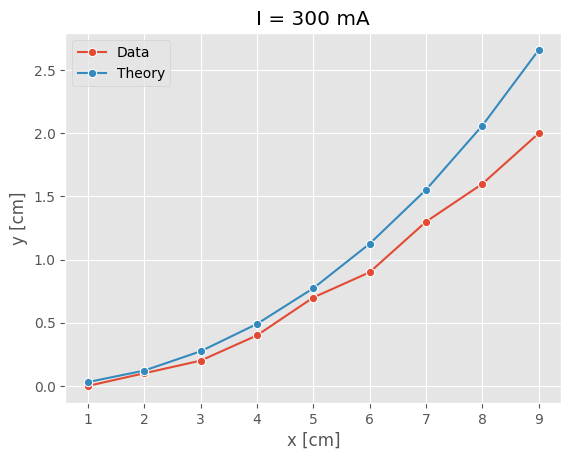

In [ ]:
sns.lineplot(x = data["x"], y = data["I3"], marker = "o", label = "Data")
sns.lineplot(x = data["x"], y = data["y3"], marker = "o", label = "Theory")
plt.title("I = 300 mA")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.savefig("I300.png")

# SSP5 - Energy Gap Dioda

In [ ]:
# Temperatur
T = np.arange(65, 115, 5) + 273

# Dioda
V1 = [0.620, 0.612, 0.602, 0.594, 0.584, 0.575, 0.566, 0.556, 0.548, 0.538]
V2 = [0.662, 0.654, 0.646, 0.638, 0.629, 0.621, 0.612, 0.604, 0.595, 0.586]

# LED
V3 = [1.983, 1.977, 1.969, 1.962, 1.954, 1.947, 1.939, 1.924, 1.917, 1.913]
V4 = [2.167, 2.162, 2.158, 2.157, 2.152, 2.147, 2.142, 2.123, 2.118, 2.116]

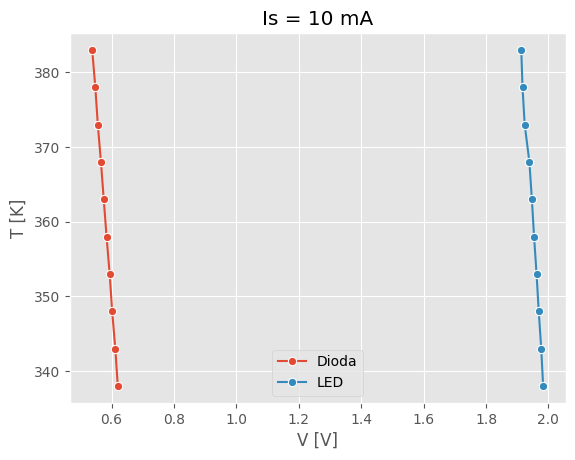

In [ ]:
sns.lineplot(x = V1, y = T, marker = "o", label = "Dioda")
sns.lineplot(x = V3, y = T, marker = "o", label = "LED")
plt.title("Is = 10 mA")
plt.xlabel("V [V]")
plt.ylabel("T [K]")
plt.savefig("10mA.png")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.448e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):           3.11e-15
Time:                        02:53:13   Log-Likelihood:               -0.70138
No. Observations:                  10   AIC:                             5.403
Df Residuals:                       8   BIC:                             6.008
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        677.2206      2.026    334.238      0.0

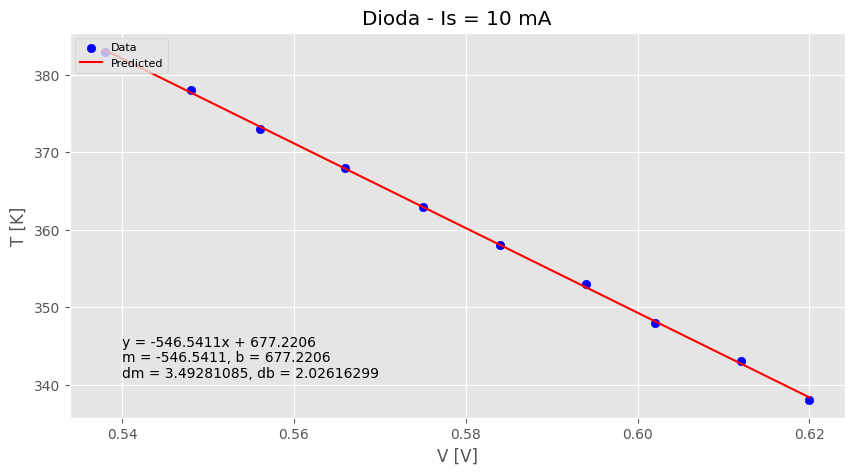

In [ ]:
# Menggunakan Library Statsmodels
x = V1
y = T

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Dioda - Is = 10 mA")
plt.xlabel("V [V]")
plt.ylabel("T [K]")
plt.text(0.54, 345, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(0.54, 343, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(0.54, 341, "dm = " + str(results.bse[1].round(8)) + ", db = " + str(results.bse[0].round(8)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Dioda1.png")

In [ ]:
E = (-1 * 677.2206)/(-546.5411)
E

1.2391027865973847

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     892.3
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.71e-09
Time:                        02:58:45   Log-Likelihood:                -17.218
No. Observations:                  10   AIC:                             38.44
Df Residuals:                       8   BIC:                             39.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1539.7955     39.482     39.000      0.0

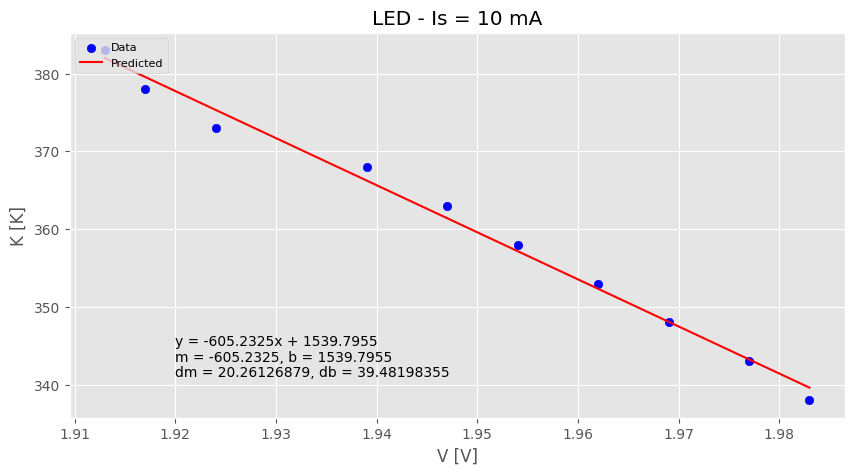

In [ ]:
# Menggunakan Library Statsmodels
x = V3
y = T

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("LED - Is = 10 mA")
plt.xlabel("V [V]")
plt.ylabel("K [K]")
plt.text(1.92, 345, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(1.92, 343, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(1.92, 341, "dm = " + str(results.bse[1].round(8)) + ", db = " + str(results.bse[0].round(8)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("LED1.png")

In [ ]:
E = (-1 * 1539.7955)/(-605.2325)
E

2.544138822683845

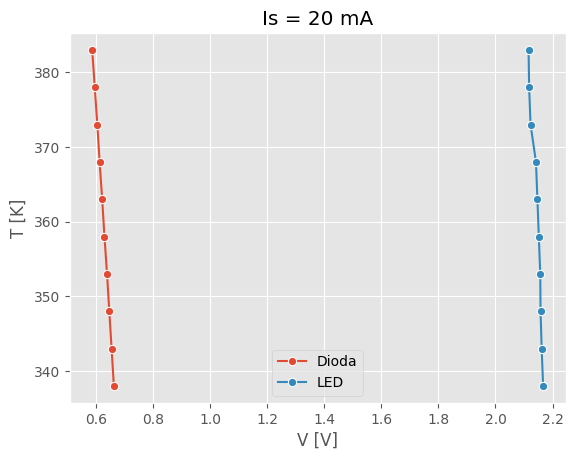

In [ ]:
sns.lineplot(x = V2, y = T, marker = "o", label = "Dioda")
sns.lineplot(x = V4, y = T, marker = "o", label = "LED")
plt.title("Is = 20 mA")
plt.xlabel("V [V]")
plt.ylabel("T [K]")
plt.savefig("20mA.png")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.410e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):           3.31e-15
Time:                        03:01:50   Log-Likelihood:               -0.77952
No. Observations:                  10   AIC:                             5.559
Df Residuals:                       8   BIC:                             6.164
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        730.3539      2.384    306.358      0.0

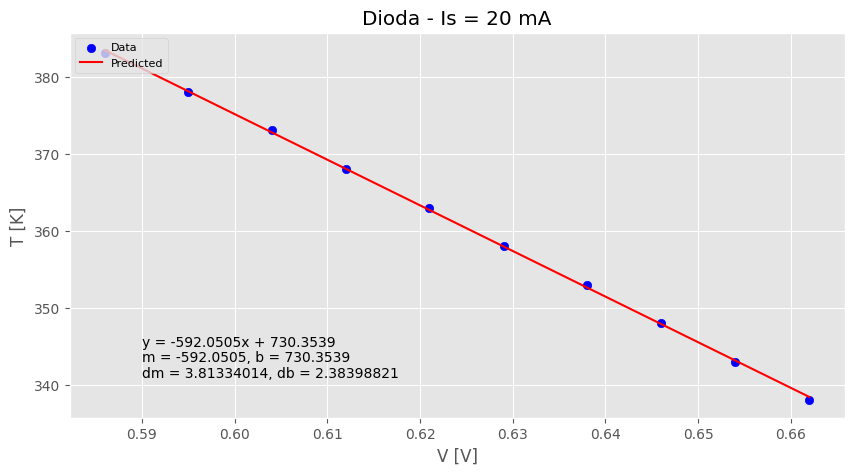

In [ ]:
# Menggunakan Library Statsmodels
x = V2
y = T

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Dioda - Is = 20 mA")
plt.xlabel("V [V]")
plt.ylabel("T [K]")
plt.text(0.59, 345, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(0.59, 343, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(0.59, 341, "dm = " + str(results.bse[1].round(8)) + ", db = " + str(results.bse[0].round(8)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Dioda2.png")

In [ ]:
E = (-1 * 730.3539)/(-592.0505)
E

1.233600681022987

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sat, 27 May 2023   Prob (F-statistic):           5.61e-06
Time:                        03:04:00   Log-Likelihood:                -27.307
No. Observations:                  10   AIC:                             58.61
Df Residuals:                       8   BIC:                             59.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2024.5431    157.459     12.858      0.0

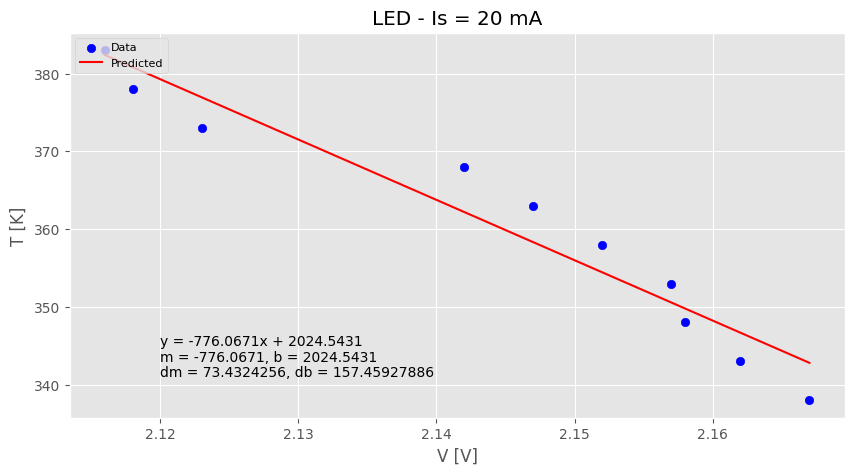

In [ ]:
# Menggunakan Library Statsmodels
x = V4
y = T

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("LED - Is = 20 mA")
plt.xlabel("V [V]")
plt.ylabel("T [K]")
plt.text(2.12, 345, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(2.12, 343, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(2.12, 341, "dm = " + str(results.bse[1].round(8)) + ", db = " + str(results.bse[0].round(8)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("LED2.png")

In [ ]:
E = (-1 * 2024.5431)/(-776.0671)
E

2.6087217200677624

# EM2 - Microwave

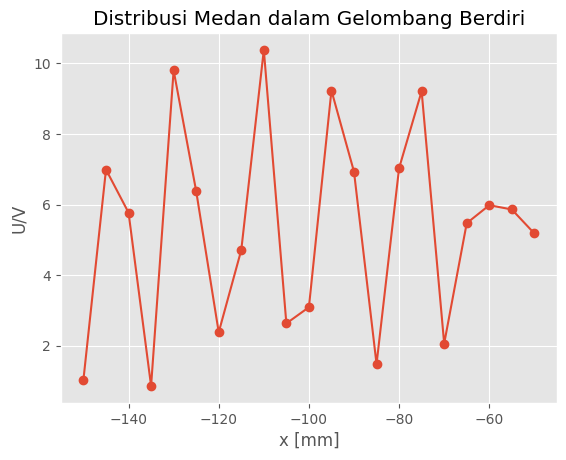

In [ ]:
x = np.arange(50, 155, 5) * -1
y = np.array([5.18, 5.86, 5.98, 5.47, 2.06, 9.21, 7.03, 1.48, 6.93, 9.23, 3.09, 2.63, 10.38, 4.71, 2.38, 6.38, 9.8, 0.86, 5.77, 6.99, 1.04])
plt.plot(x, y, marker = "o")
plt.xlabel("x [mm]")
plt.ylabel("U/V")
plt.title("Distribusi Medan dalam Gelombang Berdiri")
plt.savefig("Microwaves.png")